In [42]:
# pip install pandas_datareader
# !pip install yfinance


In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

C:\Users\kruta\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# #Get the stock quote
# from pandas_datareader import data as pdr
# import yfinance as yfin
# yfin.pdr_override()
# df = pdr.get_data_yahoo('AAPL', start = "2012-01-01", end ="2019-12-17")
# print(df)

import yfinance as yf

df = yf.download('TSLA', start='2012-01-01', end='2023-11-07')
df
# df = web.DataReader("AAPL", data_source ="yahoo", start = "2012-01-01", end ="2019-12-17")
# df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300
2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700
2023-11-02,212.970001,219.199997,211.449997,218.509995,218.509995,125987600


In [3]:
#get the numbers of rows and columns in the data set
df.shape

(2981, 6)

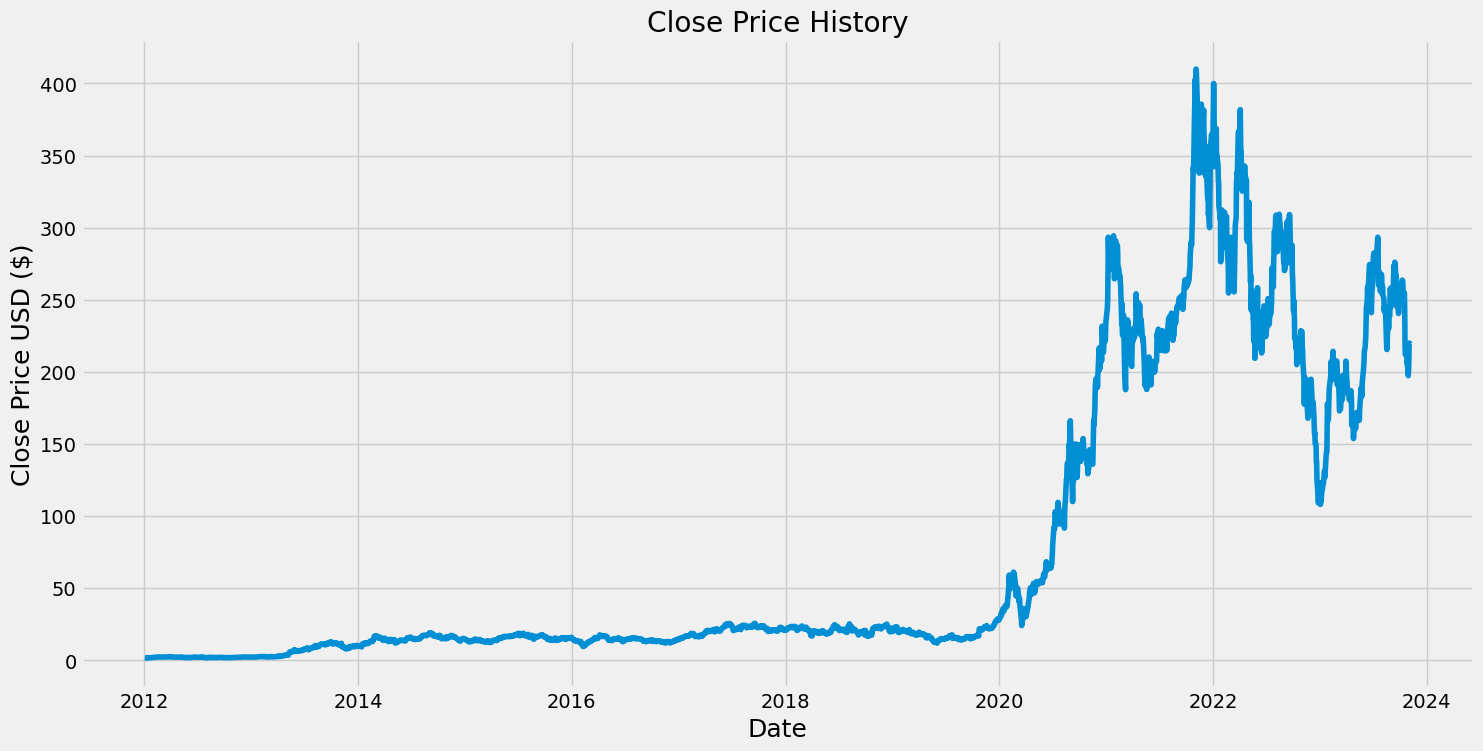

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpyu array 
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len


2385

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.53125305],
       [0.53480308],
       [0.53311376]])

In [7]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]



In [8]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2325, 60, 1)

In [9]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2325/2325 [==============================] - 40s 16ms/step - loss: 8.6460e-04


In [12]:
## Create the testing data set
#Create a new array containing scaled values from index
test_data =  scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
#Convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.54137258, 0.53632914, 0.56024066, ..., 0.50528502, 0.53210181,
        0.55107595],
       [0.53632914, 0.56024066, 0.5607058 , ..., 0.53210181, 0.55107595,
        0.544588  ],
       [0.56024066, 0.5607058 , 0.54385351, ..., 0.55107595, 0.544588  ,
        0.55833915],
       ...,
       [0.58922824, 0.5969403 , 0.59035443, ..., 0.47947202, 0.48799201,
        0.49979272],
       [0.5969403 , 0.59035443, 0.58327891, ..., 0.48799201, 0.49979272,
        0.53125305],
       [0.59035443, 0.58327891, 0.56663066, ..., 0.49979272, 0.53125305,
        0.53480308]])

In [14]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
x_test.shape

(596, 60, 1)

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 9ms/step


In [17]:
#Get the root mean squared eoor (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.7691441222325266

C:\Users\kruta\AppData\Local\Temp\ipykernel_22348\717284021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


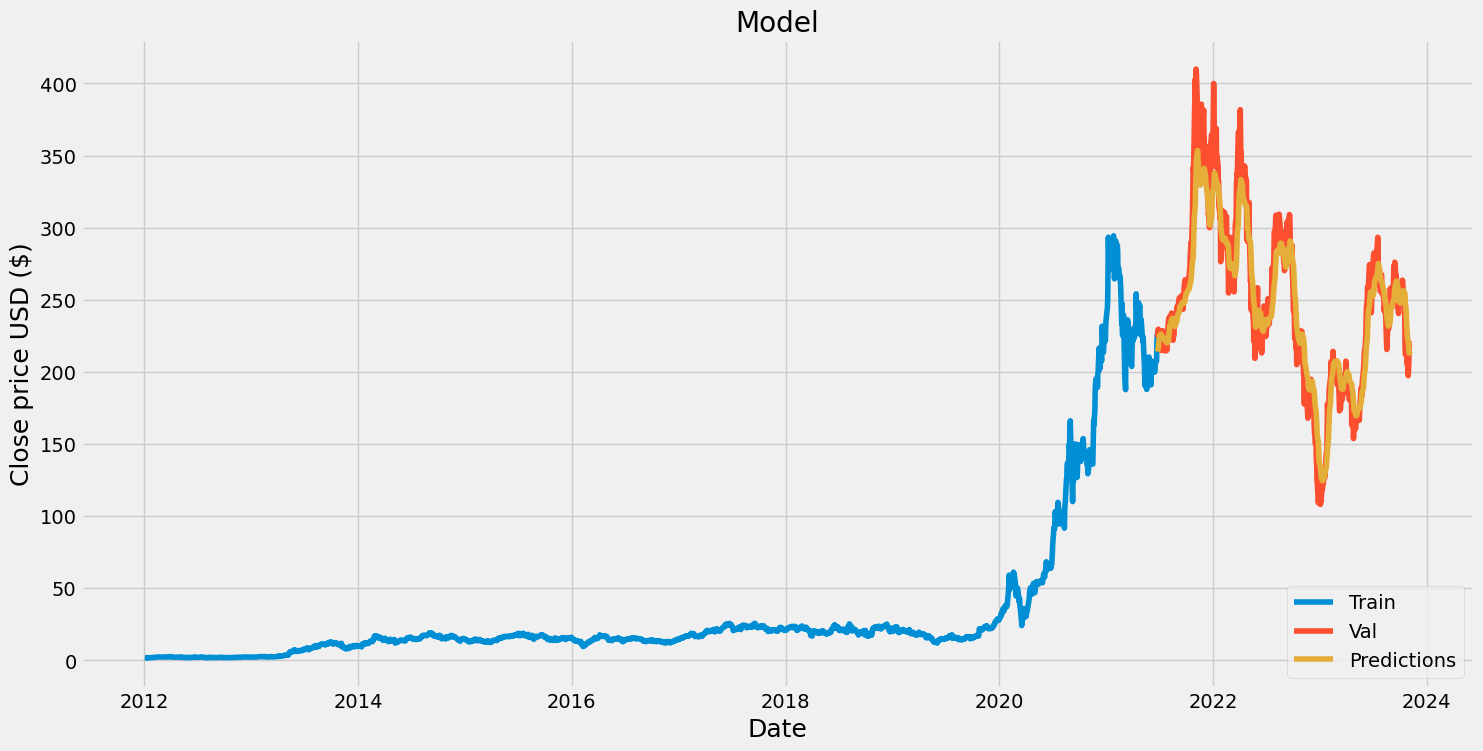

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close price USD ($)", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-25,223.956665,214.061035
2021-06-28,229.573334,216.791611
2021-06-29,226.919998,219.733749
2021-06-30,226.566666,222.110458
2021-07-01,225.973328,223.920715
...,...,...
2023-10-31,200.839996,217.738358
2023-11-01,205.660004,214.794449
2023-11-02,218.509995,212.981262


In [22]:
# Assuming the existing code until the last segment provided

# ... [Your existing code]

# Get the quote for December 2023 (you already have data up to 7th November 2023)
import yfinance as yf
apple_quote = yf.download('TSLA', start='2023-11-08', end='2023-11-10')
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df.values[-60:]

# Scale the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 17ms/step
[[70.54304]]


In [20]:
#Get the quote
# apple_quote =  web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
import yfinance as yf
apple_quote = yf.download('TSLA', start='2012-01-01', end='2023-12-07')
apple_quote
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
new_df

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Covert the X_test dataset to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price 
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 21ms/step
[[205.50905]]


In [41]:
# import yfinance as yf
# apple_quote2 = yf.download('AAPL', start='2023-11-08', end='2023-11-08')
# print(apple_quote2['Close'])

# result = yf.download(tickers = 'aapl', start = '2023-11-08',end = '2023-11-09', prepost = True,  progress=False)
# # result.drop(index="2023-11-07", inplace=True)
# print(result)